In [2]:
# -*-coding:utf8-*-#
"""
create time:15-10-25 下午12:09

任何一副灰度图像 可以 看成拓扑平面
灰度值 的区域可以 看成是 山峰 
灰度值低的区域可以 看成是山谷。
我们向每一个山谷中灌不同颜色的水。随着水的位的升  不同山谷的水就会相遇汇合 
为了防止不同山 的水 汇合 我们需要在水汇合的地方构建 堤坝。不停的灌水 不停的构建堤坝
直到所有的山峰都被水淹没。
我们构建好的堤坝就是对图像的分割。 
这就是分水岭算法的背后哲理。

每一次灌水 我们的标签就会 更新 当两个不同 色的标签相 时就构建堤 坝 直到将所有山峰淹没 最后我们得到的 界对  堤坝 的值为 -1

"""

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('img/water_coins.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow('thresh', thresh)

# noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)
# Finding sure foreground area
# 距离变换的基本含义是计算一个图像中非像素点到最近的零像素点的距离
# 也就是到零像素点的最短距离
# 个最常见的距离变换算法就是通过连续的腐蚀操作来实现,
# 腐蚀操作的停止条件是所有前景像素都被完全腐蚀。
# 这样根据腐蚀的先后顺序，我们就得到各个前景像素点到前景中心骨架像素点的距离
# 根据各个像素点的距离值，设置为不同的灰度值。这样就完成了二值图像的距离变换
# cv2.distanceTransform(src, distanceType, maskSize)
# 第二个参数 0,1,2 分别 示 CV_DIST_L1, CV_DIST_L2 , CV_DIST_C
dist_transform = cv2.distanceTransform(opening, 1, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)#图像相减
cv2.imshow('unknown', unknown)
# 边界

# 腐蚀

# Marker labelling创建标签
ret, markers1 = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
# 把将背景标 为 0 其他的对 使用从 1 开始的正整数标
markers = markers1 + 1
# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

# cv2.imshow('markers', markers1)

# 到最后一步 实施分水岭算法了。标签图像将会 修 改  界区域的标 将变为 -1
markers3 = cv2.watershed(img, markers)
img[markers3 == -1] = [255, 0, 0]

cv2.imshow('watershed', img)
cv2.waitKey(10000)
cv2.destroyAllWindows()

grabcut原理
$$E(\underline \alpha,k,\underline \theta ,z)= U(\underline \alpha,k,\underline \theta, z) +V(\underline \alpha, z)$$
$$U(\underline \alpha, k, \underline \theta, z) = \sum_nD(\alpha_n,k_n,\underline \theta, z_n)$$
$$D(\alpha_n,k_n,\underline \theta,z_n) = -\log\pi(\alpha_n,k_n) + \frac12\log det\Sigma(\alpha_n,k_n)$$
$$k_n := \underset{k}\arg\min D$$
$$\prod_{i=1}, \prod\limits_{i=1}$$
$$\sum_{\substack{0<i<n \\ 0<j<n}} A_{ij}$$
$$\underset{0\leq j \leq k-1}{\arg\min}$$
$$a\overset{?} = b$$
$$\underset{\{\alpha_n:n\in T_U\}}\min = \underset{k}\min(\underline\alpha,\theta)$$
$$V(\underline\alpha,z) = \gamma \sum_{(m,n)\in C}$$
$$\underset{\substack{0<i<n \\ 0<j<n}}{\arg\min}$$
$$g(x;u,\Sigma) = \frac{1}{\sqrt{(2\pi)^d \lvert\Sigma\lvert}}e^{[-\frac12(x-u)^T\Sigma(x-u)]}$$

In [ ]:
# -*-coding:utf8-*-#
"""
create time:15-10-25 下午12:20

img - 输入图像
• mask-掩模图像 用来确定 些区域是背景 前景 可能是前景/背景等。 可以 置为 cv2.GC_BGD,cv2.GC_FGD,cv2.GC_PR_BGD,cv2.GC_PR_FGD  或者直接 入 0,1,2,3 也 。
• rect - 包含前景的矩形 格式为 (x,y,w,h)
• bdgModel, fgdModel - 算法内 使用的数组. 你只  创建两个大
小为 (1,65) 数据类型为 np.float64 的数组。
• iterCount - 算法的迭代次数
• mode可以 置为cv2.GC_INIT_WITH_RECT或cv2.GC_INIT_WITH_MASK  也可以联合使用。 是用来确定我们  修改的方式 矩形模式或者掩模
模式。
"""

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('img/messi5.jpg')

mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
rect = (50, 50, 450, 290)

# 函数的返回值是更新的 mask, bgdModel, fgdModel
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, iterCount=5, mode=cv2.GC_INIT_WITH_RECT)
#迭代 5 次

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
img = img * mask2[:, :, np.newaxis]

plt.imshow(img), plt.colorbar(), plt.show()


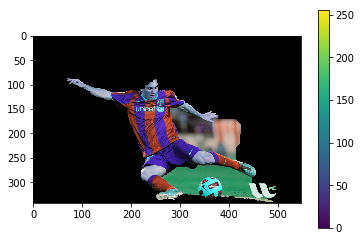

IndexError: boolean index did not match indexed array along dimension 0; dimension is 342 but corresponding boolean dimension is 189

In [4]:
# -*-coding:utf8-*-#
__author__ = 'play4fun'
"""
create time:15-10-25 下午12:20
实 上我是怎么做的呢 我们使用图像编  件打开 入图像 
添加一个 图层 
使用笔刷工具在  的地方使用白色绘制 比如头发  子 球等 
 使 用 色笔刷在不  的地方绘制 比如 logo 草地等 。
 然后将其他地方用灰 色填充 保存成新的掩码图像。
 在 OpenCV 中导入 个掩模图像 根据新的 掩码图像对原来的掩模图像  编 。
"""

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('img/messi5.jpg')
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
rect = (50, 50, 450, 290)
# 函数的返回值是更新的 mask, bgdModel, fgdModel
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
img = img * mask2[:, :, np.newaxis]
plt.imshow(img), plt.colorbar(), plt.show()

# newmask is the mask image I manually labelled
newmask = cv2.imread('img/newmask.jpg', 0)
# whereever it is marked white (sure foreground), change mask=1
# whereever it is marked black (sure background), change mask=0
mask[newmask == 0] = 0
mask[newmask == 255] = 1
mask, bgdModel, fgdModel = cv2.grabCut(img, mask, None, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_MASK)
mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
img = img * mask[:, :, np.newaxis]
plt.imshow(img), plt.colorbar(), plt.show()


In [ ]:
# -*-coding:utf8-*-#
__author__ = 'play4fun'
"""
create time:15-10-28 下午7:27

cv2.cornerHarris() 参数如下 
• img - 数据类型为 float32 的 入图像。
• blockSize -  点检测中 考 的 域大小。
• ksize - Sobel 求导中使用的窗口大小
• k - Harris  点检测方程中的自由参数 取值参数为 [0,04 0.06].
"""

import cv2
import numpy as np

filename = 'img/chessboard.png'
# filename = '../data/chessboard-3.png'
# filename = '../data/corner-detection.jpg'

img = cv2.imread(filename)
img = cv2.resize(img, (640, 480))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# 输入图像必 是 float32 最后一个参数在 0.04 到 0.05 之间
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
# result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.01 * dst.max()] = [0, 0, 255]

cv2.namedWindow('dst', cv2.WINDOW_NORMAL)
cv2.imshow('dst', img)
cv2.waitKey(10000)
cv2.destroyAllWindows()


In [ ]:
# -*-coding:utf8-*-#
__author__ = 'play4fun'
"""
create time:15-10-29 上午7:47

最大精度的角点检测

首先我们 找到 Harris 角点
 然后将角点的重心传给这个函数进行修正。
 Harris 角点用红色像素标出 
 绿色像素是修正后的像素。
 在使用 个函数是我们 定义一个爹代停止条件。
 当 代次数 到或者精度条件满 后 代就会停止。
 我们同样需要定义进行角点搜索的邻域大小。
"""

import cv2
import numpy as np

filename = 'img/chessboard-2.png'
img = cv2.imread(filename)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
dst = cv2.dilate(dst, None)
ret, dst = cv2.threshold(dst, 0.01 * dst.max(), 255, 0)
dst = np.uint8(dst)

# find centroids
# connectedComponentsWithStats(InputArray image, OutputArray labels, OutputArray stats,
# OutputArray centroids, int connectivity=8, int ltype=CV_32S)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
# Python: cv2.cornerSubPix(image, corners, winSize, zeroZone, criteria)
# zeroZone – Half of the size of the dead region in the middle of the search zone
# over which the summation in the formula below is not done. It is used sometimes
# to avoid possible singularities of the autocorrelation matrix. The value of (-1,-1)
# indicates that there is no such a size.
# 返回值由 点坐标组成的一个数组 而 图像
corners = cv2.cornerSubPix(gray, np.float32(centroids), (5, 5), (-1, -1), criteria)
# Now draw them
res = np.hstack((centroids, corners))
# np.int0 可以用来省略小数点后的数字，非四舍五入
res = np.int0(res)
img[res[:, 1], res[:, 0]] = [0, 0, 255]
img[res[:, 3], res[:, 2]] = [0, 255, 0]

# cv2.imwrite('subpixel5.png',img)
cv2.imshow('subpixel5.png', img)
cv2.waitKey(0)


In [ ]:
# -*-coding:utf8-*-#
"""
create time:15-10-29 上午7:52

使用 Shi-Tomasi 方法获取图像中 N 个最好的角点

 常情况下  入的应  是灰度图像。然后确定你想 检测到的 点数目。再 置 点的  水平 0 到 1 之 。它代 了 点的最低   低于 个数的所有 点 会 忽略。
 最 后在 置两个角点之间的最短欧式距离。
 
 所有低于  水平的 点  会 忽略。然后再把合格 点按 点     序排列。
 函数会 用 点   最 的 个 点 排序后的第一个  然后将它   最小 离之内 的 点  删掉。
 按着 样的方式最后 回 N 个最佳 点。
 
 以后会发现这个函数很适合在目标跟踪中使用
"""

import numpy as np
import cv2
from matplotlib import pyplot as plt

# filename = '../data/corner-detection.jpg'
filename = 'img/blox.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, maxCorners=25, qualityLevel=0.01, minDistance=10)

# 返回的结果是 [[ 311., 250.]] 两层括号的数组。
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, 255, -1)

plt.imshow(img), plt.show()


In [ ]:
# -*- coding: utf-8 -*-
# @Time    : 2017/7/13 下午2:23
# @Author  : play4fun
# @File    : sift.py
# @Software: PyCharm

"""
sift.py:尺度不变特征变换

关键点 极值点 定位

"""

import cv2
import numpy as np

img = cv2.imread('img/home.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray, None)
img = cv2.drawKeypoints(gray, kp, img)

# 计算关键点描述符
# 使用函数 sift.compute() 来 计算 些关键点的描述符。例如
# kp, des = sift.compute(gray, kp)
kp, des = sift.detectAndCompute(gray,None)

cv2.imwrite('sift_keypoints.jpg', img)
cv2.imshow('sift_keypoints.jpg', img)
cv2.waitKey(10000)
cv2.destroyAllWindows()

In [ ]:
# -*- coding: utf-8 -*-
# @Time    : 2017/7/13 下午3:13
# @Author  : play4fun
# @File    : surf.py
# @Software: PyCharm

"""
surf.py:SURF加速稳健特征，加速版的SIFT

积分图像的一大特点是 计算图像中某个窗 口内所有像素和时，计算量的大小与窗口大小无关

"""
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('img/butterfly.jpg', 0)
# Create SURF object. You can specify params here or later. # Here I set Hessian Threshold to 400
# surf = cv2.SURF(400)
surf = cv2.xfeatures2d.SURF_create(400)

# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(img, None)
len(kp)  # 699

# 提高Hessian 的阈值
# Check present Hessian threshold
print(surf.getHessianThreshold())
# 400.0
# We set it to some 50000. Remember, it is just for representing in picture.
# In actual cases, it is better to have a value 300-500
surf.setHessianThreshold(50000)
# Again compute keypoints and check its number.
kp, des = surf.detectAndCompute(img, None)
print(len(kp))
# 47
img2 = cv2.drawKeypoints(img, kp, None, (255, 0, 0), 4)

plt.imshow(img2)
plt.show()

# 最后我们再看看关键点描述符的大小 如果是 64 维的就改成 128 维。

# Find size of descriptor
print(surf.descriptorSize())
# 64
# That means flag, "extended" is False.
print(surf.getExtended())
# False
# So we make it to True to get 128-dim descriptors.
# surf.extended = True
surf.setExtended(True)
kp, des = surf.detectAndCompute(img, None)
print(surf.descriptorSize())
# 128
print(des.shape)
# (47, 128)

# 接下来要做的就是匹配了 我们会在后讨论。


In [ ]:
# -*- coding: utf-8 -*-
# @Time    : 2017/7/13 下午3:31
# @Author  : play4fun
# @File    : fast.py
# @Software: PyCharm

"""
fast.py:FAST 特征检测器

效果很好。但是从实时处理的角度来看
这些算法 不够快。
一个最好例子就是 SLAM 同步定位与地图构建
移动机器人 它们的计算资源非常有限。

"""

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('img/blox.jpg', 0)

# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img, None)
img2 = cv2.drawKeypoints(img, kp, None, color=(255, 0, 0))

# Print all default params
print("Threshold: ", fast.getThreshold())
print("nonmaxSuppression: ", fast.getNonmaxSuppression())
print("neighborhood: ", fast.getType())
print("Total Keypoints with nonmaxSuppression: ", len(kp))
cv2.imwrite('fast_true.png', img2)

# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
print("Total Keypoints without nonmaxSuppression: ", len(kp))

img3 = cv2.drawKeypoints(img, kp, None, color=(255, 0, 0))
cv2.imwrite('fast_false.png', img3)

#结果如下。第一幅图是使用了 非最大值抑制的结果
# 第二幅没有使用非最大值抑制。

In [ ]:
# -*- coding: utf-8 -*-
# @Time    : 2017/7/13 下午3:38
# @Author  : play4fun
# @File    : brief.py
# @Software: PyCharm

"""
brief.py:
算法使用的是已经平滑后的图像

非常重要的一点是 BRIEF 是一种特征描述符 它不提供查找特征的方法。 所以我们不得不使用其他特征检测器 比如 SIFT 和 SURF 等。
原始文献推荐 使用 CenSurE 特征检测器  种算法很快。而且 BRIEF 算法对 CenSurE 关键点的描述效果 比 SURF 关键点的描述更好。

简单来  BRIEF 是一种对特征点描述符运算和匹 的快速方法。 这种算法可以实现很高的识别率，除非出现平面内的大旋 。

"""

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('../data/blox.jpg', 0)

# Initiate FAST detector
star = cv2.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with STAR
kp = star.detect(img, None)
# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)

print(brief.descriptorSize())
print(des.shape)


In [ ]:
# -*- coding: utf-8 -*-
# @Time    : 2017/7/13 下午3:45
# @Author  : play4fun
# @File    : orb.py
# @Software: PyCharm

"""
orb.py:
SIFT 和 SURF 算法是有专利保护的 如果你 使用它们 就可能要花钱 。但是 ORB 不需要

ORB 基本是 FAST 关 点检测和 BRIEF 关 点描 器的结合体 并
 很多修改增强了性能。 先它使用 FAST 找到关 点 然后再使用 Harris  点检测对 些关 点  排序找到其中的前 N 个点。它也使用 字塔从而产 生尺度不变性特征。

 数据的方差大的一个好处是 使得特征更容易分辨。

对于描述符，ORB使用BRIEF描述符。但我们已经看到，这个BRIEF的表现在旋转方面表现不佳。因此，ORB所做的是根据关键点的方向来“引导”。
对于在位置(xi，yi)的n个二进制测试的任何特性集，定义一个包含这些像素坐标的2 n矩阵。然后利用补丁的方向，找到旋转矩阵并旋转S，以得到引导(旋转)版本s。

ORB将角度进行离散化，以增加2/30(12度)，并构造一个预先计算过的简短模式的查找表。只要键点的方向是一致的，就会使用正确的点集来计算它的描述符。

BRIEF有一个重要的属性，即每个比特的特性都有很大的方差，而平均值接近0.5。但是一旦它沿着键点方向移动，它就会失去这个属性并变得更加分散。高方差使特征更有区别，因为它对输入的响应不同。另一个可取的特性是让测试不相关，因为每个测试都将对结果有所贡献。为了解决所有这些问题，ORB在所有可能的二进制测试中运行一个贪婪的搜索，以找到那些既有高方差又接近0.5的，同时又不相关的。结果被称为rBRIEF。

对于描述符匹配，在传统的LSH上改进的多探测LSH是被使用的。这篇文章说，ORB比冲浪快得多，而且比冲浪还好。对于全景拼接的低功率设备，ORB是一个不错的选择。

"""

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('../data/blox.jpg', 0)

# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img, None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)

plt.imshow(img2), plt.show()


In [ ]:
# -*- coding: utf-8 -*-
# @Time    : 2017/7/13 下午4:00
# @Author  : play4fun
# @File    : 37.2-对ORB描述符进行蛮力匹配.py
# @Software: PyCharm

"""
37.2-对ORB描述符进行蛮力匹配.py:
匹配器对象是什么
matches = bf.match(des1, des2) 返回值是一个 DMatch对象列表
DMatch 对 具有下列属性
• DMatch.distance - 描 符之 的 离。 小 好。
• DMatch.trainIdx - 目标图像中描 符的索引。
• DMatch.queryIdx - 查 图像中描 符的索引。
• DMatch.imgIdx - 目标图像的索引。
"""

import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('../data/box.png', 0)  # queryImage
img2 = cv2.imread('../data/box_in_scene.png', 0)  # trainImage

# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1, des2)

# Sort them in the order of their distance.
matches = sorted(matches, key=lambda x: x.distance)
# Draw first 10 matches.
# img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], flags=2)  # 前10个匹配
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None,flags=2)  # 前10个匹配

plt.imshow(img3), plt.show()


In [ ]:
# -*-coding:utf8-*-#
__author__ = 'play4fun'
"""
create time:15-11-9 下午1:28
对 SIFT 描述符进行蛮力匹配和比值测试 
"""

import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('../data/box.png', 0)
# queryImage
img2 = cv2.imread('../data/box_in_scene.png', 0)  # trainImage
# Initiate SIFT detector
# sift = cv2.SIFT()
sift = cv2.xfeatures2d.SIFT_create()


# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
# 比值测试，首先获取与 A距离最近的点 B （最近）和 C （次近），
# 只有当 B/C 小于阀值时（0.75）才被认为是匹配，
# 因为假设匹配是一一对应的，真正的匹配的理想距离为0
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
# img3 = np.ndarray([2, 2])
# img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good[:10], img3, flags=2)

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

plt.imshow(img3), plt.show()


In [ ]:
# -*- coding: utf-8 -*-
# @Time    : 2017/7/13 下午4:22
# @Author  : play4fun
# @File    : 37.5-FLANN匹配器.py
# @Software: PyCharm

"""
37.5-FLANN匹配器.py:
FLANN 是快速最近邻搜索包 Fast_Library_for_Approximate_Nearest_Neighbors 的简称。
它是一个对大数据集和高维特征进行最近邻搜索的算法的集合
 而且这些算法 已经被优化 了。
 在面对大数据集时它的效果 好于 BFMatcher

"""



import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('../data/box.png', 0)  # queryImage
img2 = cv2.imread('../data/box_in_scene.png', 0)  # trainImage

# Initiate SIFT detector
# sift = cv2.SIFT()
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0, 0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]

draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=(255, 0, 0),
                   matchesMask=matchesMask,
                   flags=0)

img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)

plt.imshow(img3, ), plt.show()


In [1]:
# -*- coding: utf-8 -*-
# @Time    : 2017/7/13 下午5:13
# @Author  : play4fun
# @File    : findHomography.py
# @Software: PyCharm

"""
findHomography.py:联合使用特征提取和 calib3d 模块中的 findHomography 在复杂图像中查找已知对象
"""

import numpy as np
import cv2
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10
img1 = cv2.imread('img/box.png', 0)  # queryImage
img2 = cv2.imread('img/box_in_scene.png', 0)  # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)
'''
现在我们 置只有存在 10 个以上匹 时才去查找目标 MIN_MATCH_COUNT=10   否则显示 告消息  现在匹 不   
如果找到了 够的匹  我们 提取两幅图像中匹 点的坐标。把它们传 入到函数中 算  变换。一旦我们找到 3x3 的变换矩  就可以使用它将查  图像的四个 点 
四个  变换到目标图像中去了。然后再绘制出来。
'''

if len(good) > MIN_MATCH_COUNT:
    # 获取关 点的坐标
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    # 第三个参数 Method used to computed a homography matrix. The following methods are possible: #0 - a regular method using all the points
    # CV_RANSAC - RANSAC-based robust method
    # CV_LMEDS - Least-Median robust method
    # 第四个参数取值范围在 1 到 10  绝一个点对的 值。原图像的点经 变换后点与目标图像上对应点的 差 #    差就 为是 outlier
    #  回值中 M 为变换矩 。
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()
    # 获得原图像的高和宽
    h, w = img1.shape
    # 使用得到的变换矩 对原图像的四个   变换 获得在目标图像上对应的坐标
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, M)
    # 原图像为灰度图
    img2 = cv2.polylines(img2, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)
else:
    print("Not enough matches are found - %d/%d" % (len(good), MIN_MATCH_COUNT))
    matchesMask = None

# 最后我再绘制 inliers 如果能成功的找到目标图像的话  或者匹配的关  点 如果失败。
draw_params = dict(matchColor=(0, 255, 0),  # draw matches in green color
                   singlePointColor=None,
                   matchesMask=matchesMask,  # draw only inliers
                   flags=2)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, good, None, **draw_params)

plt.imshow(img3, 'gray'), plt.show()
# 复杂图像中被找到的目标图像被标记成白色


AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

$$\sqrt[n]{3}$$
$$\Delta adc \sim \Delta def$$
$$f(n) = \begin{cases} 
n/2,  & \mbox{if }n\mbox{ is even} \\
3n+1, & \mbox{if }n\mbox{ is odd}
\end{cases}$$
$$\begin{align}
\because\begin{cases}
\acute{a}x^2+bx^2+c\gtrless0\gtrless\grave{a}x^2+bx^2+c\\
\acute{a}>0>\grave{a}
\end{cases}
\end{align}$$

高斯公式
$$f(x) = p(x_1,x_2,\dots ,x_n) = p(x_1)p(x_2)\dots p(x_n) = \frac{1}{\sqrt[n]{2\pi}\sigma_1\sigma_2\dots \sigma_n}e^{-\frac{(x_1-u_1)^2}{2\sigma_1^2}-\frac{(x_2-u_2)^2}{2\sigma_2^2}\dots -\frac{(x_n-u_n)^2}{2\sigma_n^2}}$$
$$z^2 = \frac{(x_1-u_1)^2}{2\sigma_1^2} + \frac{(x_2-u_2)^2}{2\sigma_2^2} +\dots + \frac{(x_n-u_n)^2}{2\sigma_n^2}$$
$$\sigma_z = \sigma_1 \sigma_2 \dots \sigma_n$$
$$f(z) = \frac{1}{\sqrt[n]{2\pi}\sigma_z}e^{-\frac{z^2}{2\sigma_z}}$$
$$z^2 = z^Tz = [x_1-u_1, x_2-u_2, \dots ,x_n-u_n]\begin{bmatrix}
\frac{1}{\sigma_1^2}  &\dots & \dots & 0\\
0 & \frac{1}{\sigma_2^2} & \dots  & 0\\
\vdots & \dots &\dots &\vdots  \\
0 & 0 & \dots & \frac{1}{\sigma_n^2}
\end{bmatrix}[x_1-u_1,x_2-u_2,\dots,x_n-u_n]^T$$
$$x-u_z = x_1-u_1, x_2-u_2, \dots ,x_n-u_n$$
$$(\Sigma) = \begin{bmatrix}
\sigma_1^1 & \dots & \dots & 0 \\
0 & \sigma_2^2 & \dots & 0 \\
\vdots & \dots & \dots & \vdots \\
0 & \dots & \dots & \sigma_n^2
\end{bmatrix}$$
$$(\Sigma)^{-1} = \begin{bmatrix}
\frac{1}{\sigma_1^2} & \dots &\dots &0 \\
0 & \frac{1}{\sigma_2^2} & \dots & 0   \\
\vdots & \dots & \dots & \vdots \\
0 & \dots & \dots & \frac{1}{\sigma_n^2}
\end{bmatrix}$$
$$\sigma_z = \lvert \Sigma \rvert^{\frac12} = \sigma_1 \sigma_2 \dots \sigma_n$$
$$z^Tz = [x-u_z]\lvert \Sigma \rvert^{-1} [x-u_z]^T$$
$$f(x) = \frac{1}{\sqrt[n]{2\pi}\lvert \Sigma \rvert ^{\frac12}}e^{[x-u_z]\lvert \Sigma \rvert ^{-1}[x-u_z]^T}$$
归一化处理
